# Model Training

## 1.1 Import Data and Required Packages

### Import Pandas, Numpy and other modelling libraries

In [43]:
# Basic imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
!pip install catboost
!pip install xgboost
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import warnings

In [20]:
df = pd.read_csv('project_data/stud.csv')

In [21]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Preparing X and Y variables
- Remove **math_score** from the dataframe and use it as Y variable
- Use the other variables to predict **math_score**

In [22]:
X = df.drop(columns=['math_score'], axis=1)

In [23]:
X.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
5,female,group B,associate's degree,standard,none,83,78
6,female,group B,some college,standard,completed,95,92
7,male,group B,some college,free/reduced,none,43,39
8,male,group D,high school,free/reduced,completed,64,67
9,female,group B,high school,free/reduced,none,60,50


In [24]:
Y = df['math_score']

In [25]:
Y.head(10)

0    72
1    69
2    90
3    47
4    76
5    71
6    88
7    40
8    64
9    38
Name: math_score, dtype: int64

In [26]:
print("Categories in 'gender' variable: ")
print(df['gender'].unique(), "\n")
print("Categories in 'race_ethnicity' variable: ")
print(df['race_ethnicity'].unique(), "\n")
print("Categories in 'parental_level_of_education' variable: ")
print(df['parental_level_of_education'].unique(), "\n")
print("Categories in 'lunch' variable: ")
print(df['lunch'].unique(), "\n")
print("Categories in 'test_preparation_course' variable: ")
print(df['test_preparation_course'].unique(), "\n")

Categories in 'gender' variable: 
['female' 'male'] 

Categories in 'race_ethnicity' variable: 
['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories in 'parental_level_of_education' variable: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in 'lunch' variable: 
['standard' 'free/reduced'] 

Categories in 'test_preparation_course' variable: 
['none' 'completed'] 



In [27]:
num_cols = X.select_dtypes(exclude=['object']).columns
cat_cols = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", numeric_transformer, num_cols),
        ("StandardScaler", categorical_transformer, cat_cols)
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)



ValueError: Specifying the columns using strings is only supported for dataframes.

In [32]:
X.shape
X


array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [36]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 19), (200, 19), (800,), (200,))

### Create an Evaluate Function to give all metrics after Model Training

In [37]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")
    print(f"Mean Absolute Error: {mae}")
    
    return mse, rmse, r2, mae

In [49]:
models = {
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) #model training

    Y_train_pred = model.predict(X_train) #model prediction on train set
    Y_test_pred = model.predict(X_test) #model prediction on test set

    # Evaluate the model
    model_train_mse, model_train_rmse, model_train_r2, model_train_mae = evaluate_model(Y_train, Y_train_pred)
    model_test_mse, model_test_rmse, model_test_r2, model_test_mae = evaluate_model(Y_test, Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print()
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')

Mean Squared Error: 32.642799999999994
Root Mean Squared Error: 5.713387786593869
R-squared: 0.8552088533422393
Mean Absolute Error: 4.518
Mean Squared Error: 52.617
Root Mean Squared Error: 7.253757646902741
R-squared: 0.7837702557426202
Mean Absolute Error: 5.619
KNeighborsRegressor

Model performance for Training set
- Root Mean Squared Error: 5.7134
- Mean Absolute Error: 4.5180
- R2 Score: 0.8552
------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2538
- Mean Absolute Error: 5.6190
- R2 Score: 0.7838


Mean Squared Error: 0.078125
Root Mean Squared Error: 0.2795084971874737
R-squared: 0.9996534669718089
Mean Absolute Error: 0.01875
Mean Squared Error: 58.63
Root Mean Squared Error: 7.657022920169431
R-squared: 0.7590598113573526
Mean Absolute Error: 6.07
DecisionTreeRegressor

Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
------------------------------
Model performance f

### Results

In [54]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']) \
  .sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
5,Ridge,0.880593
4,LinearRegression,0.880433
2,RandomForestRegressor,0.853049
3,AdaBoostRegressor,0.852361
8,CatBoostRegressor,0.851632
6,Lasso,0.825320
7,XGBRegressor,0.821221
0,KNeighborsRegressor,0.783770
1,DecisionTreeRegressor,0.759060


### Linear Regression

In [56]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_test_pred) * 100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 85.16


### Plot y_pred and y_test

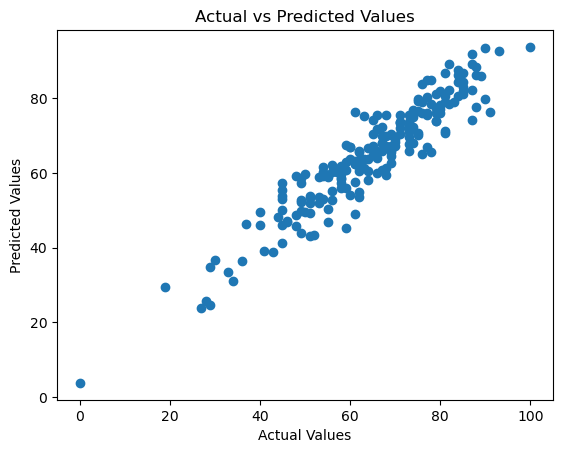

In [57]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<Axes: xlabel='math_score'>

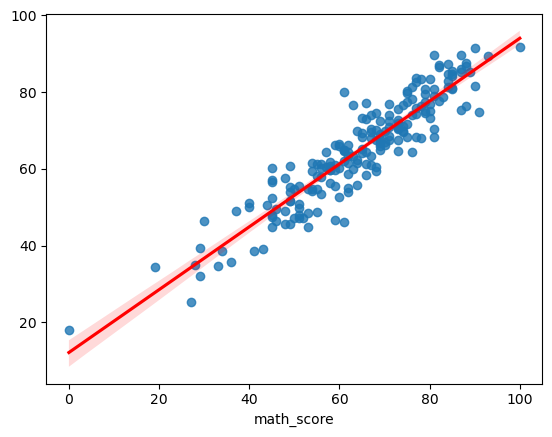

In [58]:
sns.regplot(x=Y_test, y=Y_test_pred, line_kws={"color": "red"})  

### Difference between Actual and Predicted Values

In [59]:
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred, 'Difference': Y_test - y_pred})
pred_df.head(10)

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
678,81,79.014024,1.985976
626,69,64.654609,4.345391
513,54,53.007919,0.992081
859,87,74.184710,12.815290
136,51,49.213538,1.786462
